<a href="https://colab.research.google.com/github/gmarambaia/gmarambaia/blob/main/Capstone_Coursera_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Model<p>
Regression Tree Model <p>
Neural Network Model<p>

Evaluation and selection of the Model

Lenders would also like to predict the amount of losses. Even if a loan is bad, they can recover some of the money they lent.<p>

For this part of the project, I'll need to consider loans that have `loan_status` **Charged Off**. 

In order to do it, will be necessary to create a new column called `loss`, which is the difference between `loan_amnt` and `total_pymnt`.<p>

Again the dataset will be splitted in training and validation sets using a 60:40 split.<p>

To compare their performance I will use **R-squared and RMS Error**. `loss` will be the dependent variable and all other variables except `loan_amnt`, `total_pymnt`, and `loan_status` will work as explanatory variables.

In [1]:
# importing the libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('df_predictions.csv')
df.head()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt,loan_status_bin,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,8000,6.68,245.85,41000.0,24377,51.0,29,2,8351.630000,0,0,0,1,1,0,0
1,12175,9.17,388.13,100000.0,21329,64.6,17,3,13205.910000,0,1,0,0,1,0,0
2,6400,6.92,197.38,41900.0,14936,73.2,15,1,3550.380000,1,0,0,1,0,1,0
3,12600,6.68,387.22,73800.0,9904,20.7,25,4,13125.770000,0,0,1,0,1,0,0
4,9000,8.67,284.82,82000.0,46158,77.1,29,2,9789.870001,0,1,0,0,0,0,1


In the first part of this project we attributed binary values to the varible loan_status. The status Charged Off = 1 and Fully Paid = 0. So the first thing we gonna do is drop all entries with fully paid status.

In [3]:
df['loan_status_bin'].value_counts()

0    5401
1    1077
Name: loan_status_bin, dtype: int64

We will work with only 1,077 entries. Ok let's do it.

In [4]:
#dropping entries with Fully Paid status
df.drop(df[df.loan_status_bin == 0].index, inplace=True)

In [5]:
df['loan_status_bin'].value_counts()

1    1077
Name: loan_status_bin, dtype: int64

Now, let's create our new varibale called `loss`

In [6]:
#creating the variable 'loss'
df["loss"] = (df["loan_amnt"] - df["total_pymnt"])
df.head()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt,loan_status_bin,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loss
2,6400,6.92,197.38,41900.0,14936,73.2,15,1,3550.38,1,0,0,1,0,1,0,2849.62
6,6000,7.89,187.72,43000.0,3102,50.9,20,3,1701.25,1,0,0,1,0,1,0,4298.75
8,10000,10.99,327.34,36000.0,9022,67.8,49,4,3594.63,1,0,0,1,0,1,0,6405.37
11,16000,18.25,580.45,65000.0,15460,58.8,17,6,8662.40,1,0,0,1,1,0,0,7337.60
16,12000,17.57,431.25,60000.0,16084,76.5,14,4,6850.96,1,0,0,1,0,1,0,5149.04


In [7]:
#dropping 'loan_amnt', 'total_pymnt' and 'loan_status_bin'
df.drop(['loan_amnt', 'total_pymnt', 'loan_status_bin'], axis=1, inplace = True)
df.head()

,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loss
2,6.92,197.38,41900.0,14936,73.2,15,1,0,0,1,0,1,0,2849.62
6,7.89,187.72,43000.0,3102,50.9,20,3,0,0,1,0,1,0,4298.75
8,10.99,327.34,36000.0,9022,67.8,49,4,0,0,1,0,1,0,6405.37
11,18.25,580.45,65000.0,15460,58.8,17,6,0,0,1,1,0,0,7337.60
16,17.57,431.25,60000.0,16084,76.5,14,4,0,0,1,0,1,0,5149.04


,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loss
int_rate,1.000000,0.029957,-0.230279,-0.064346,0.139886,-0.162940,0.206892,-0.078447,0.045165,0.044024,-0.166099,-0.011332,0.171322,-0.053396
installment,0.029957,1.000000,0.549896,0.358988,0.160796,0.215871,-0.002201,0.180741,0.008187,-0.174726,-0.169844,0.057914,0.102152,0.934911
annual_inc,-0.230279,0.549896,1.000000,0.361672,0.199729,0.326445,0.139248,0.281255,-0.094227,-0.202045,-0.052270,0.088158,-0.042470,0.542838
revol_bal,-0.064346,0.358988,0.361672,1.000000,0.227484,0.233177,-0.052019,0.200520,-0.009714,-0.181572,-0.024965,-0.016391,0.041184,0.345989
revol_util,0.139886,0.160796,0.199729,0.227484,1.000000,-0.065012,-0.227013,0.071799,-0.072731,-0.019793,-0.109959,0.048576,0.054490,0.141606
total_acc,-0.162940,0.215871,0.326445,0.233177,-0.065012,1.000000,0.395549,0.256350,-0.020952,-0.226554,-0.002472,-0.058370,0.063708,0.209460
acc_open_past_24mths,0.206892,-0.002201,0.139248,-0.052019,-0.227013,0.395549,1.000000,0.114399,-0.017726,-0.095633,-0.078580,-0.019368,0.095770,-0.020232
home_ownership_MORTGAGE,-0.078447,0.180741,0.281255,0.200520,0.071799,0.256350,0.114399,1.000000,-0.248911,-0.774601,0.008419,-0.001193,-0.006827,0.153038
home_ownership_OWN,0.045165,0.008187,-0.094227,-0.009714,-0.072731,-0.020952,-0.017726,-0.248911,1.000000,-0.419738,-0.035467,-0.043663,0.079921,0.013617
home_ownership_RENT,0.044024,-0.174726,-0.202045,-0.181572,-0.019793,-0.226554,-0.095633,-0.774601,-0.419738,1.000000,0.015271,0.029630,-0.045791,-0.152310


In [11]:
#importing regression libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [27]:
# Set independent and dependent variables
X = df.loc[:, df.columns != 'loss']
y = df.loc[:, df.columns == 'loss']

#importing the model
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [1464.06516949]
Coefficients: [[-1.28342515e+02  2.04428304e+01  3.72891648e-03  1.68647092e-03
   1.07908720e-01 -3.17220373e+00  3.33429479e+00 -2.26436770e+02
   1.57077820e+02  6.93589496e+01  5.47015331e+01 -2.69401948e+01
  -2.77613383e+01]]


Let’s breakdown what each of those number means:

The intercept value is the estimated average value of our dependent variable when all of our independent variables values is 0. In our case this means that in the case we sell our pie at price of 0 and spent advertising expense of 0 we will sell about 306 pies.
For the coefficients we have 2 values for the price and advertising variables respectively. This value represents the relation of our independent variable to the dependent variable, where a change of exactly 1 at the independent variable will change the value of our dependent variable the same amount as the coefficient. For example, if we increase our advertising expense by 10, we will also increase our sales by about 741 pies (74.1309 * 10).

Model Validation
After building the model it is important for us to validate it’s performance. We can evaluate a model by looking at it’s coefficient of determination (R²), F-test, t-test, and also residuals. Before we continue we will rebuild our model using the statsmodel library with the OLS() function. Then we will print the model summary using the summary() function on the model. The model summary contains lots of important value we can use to evaluate our model.

In [29]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

X = df.loc[:, df.columns != 'loss']
y = df.loc[:, df.columns == 'loss']

X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(y, X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                   loss   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     721.0
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:39:45   Log-Likelihood:                -9623.7
No. Observations:                1077   AIC:                         1.927e+04
Df Residuals:                    1065   BIC:                         1.933e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Coefficient of Determination (R²)
Coefficient of determination is the portion of the total variation in the dependent variable that is explained by variation in the independent variable. 

In [30]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.8816078370710922


R² range between 0 and 1, where R²=0 means there are no linear relationship between the variables and R²=1 shows a perfect linear relationship. In our case, we got R² score about 0.5214 which means 52.14% of our dependent variable can be explained using our independent variables.

F-Test (ANOVA)
F-test or ANOVA (Analysis of variance) in multi-linear regression can be used to determine whether our complex model perform better than a simpler model (e.g. model with only one independent variable). With F-test we can evaluate the significance of our model by calculating the probability of observing an F-statistic that is at least as high as the value that our model obtained. Similar to R² score, we can easily get the F-statistic and probability of said F-statistic by accessing the .fvalues and .f_pvalues attribute of our model as below.

In [31]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 720.9570781567478
Probability of observing value at least as high as F-statistic: 0.0


Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

T-test
The t-statistic is the coefficient divided by its standard error. The standard error is an estimate of the standard deviation of the coefficient, the amount it varies across cases. It can be thought of as a measure of the precision with which the regression coefficient is measured. Same as the F-test, the p-value show the probability of seeing a result as extreme as the one our model have. We can also get the p-value for all of our variables by calling the .pvalues attribute on the model.

In [32]:
print(olsmod.pvalues)

const                                  7.907358e-06
int_rate                               2.849925e-10
installment                            0.000000e+00
annual_inc                             1.644518e-01
revol_bal                              6.033570e-01
revol_util                             9.705579e-01
total_acc                              6.170063e-01
acc_open_past_24mths                   8.894161e-01
home_ownership_MORTGAGE                5.826608e-01
home_ownership_OWN                     1.117851e-03
home_ownership_RENT                    1.607331e-04
verification_status_Not Verified       5.210542e-04
verification_status_Source Verified    8.975517e-03
verification_status_Verified           2.086941e-02
dtype: float64


Both of our independent variables, price and advertising, have p-value less than 0.05 which shows that there is sufficient evidence that price and advertising affects our pie sales.

Assumption Testing
Next, we will validate our model by doing residual analysis, below are the list of test or assumption we will do to check on our model validity:

Linearity
Normality
Multicollinearity
Autocorrelation
Homoscedasticity

Residual is the difference between the observed value and predicted value from our dataset. With statsmodel we can easily get the residual value of our model by simply accesing the .resid attribute of the model and then we can keep it in a new column called 'residual' in our df_pie dataframe.

In [33]:
df['loss_pred'] = olsmod.predict(X)
df['residual'] = olsmod.resid
df.head()

,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loss,loss_pred,residual
2,6.92,197.38,41900.0,14936,73.2,15,1,0,0,1,0,1,0,2849.62,4798.440476,-1948.820476
6,7.89,187.72,43000.0,3102,50.9,20,3,0,0,1,0,1,0,4298.75,4449.015813,-150.265813
8,10.99,327.34,36000.0,9022,67.8,49,4,0,0,1,0,1,0,6405.37,6802.427536,-397.057536
11,18.25,580.45,65000.0,15460,58.8,17,6,0,0,1,1,0,0,7337.60,11352.791420,-4015.191420
16,17.57,431.25,60000.0,16084,76.5,14,4,0,0,1,0,1,0,5149.04,8295.518086,-3146.478086


Linearity
This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

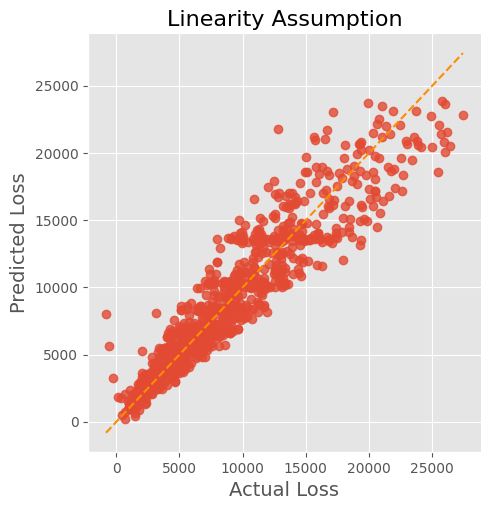

In [34]:
# Plotting the observed vs predicted values
sns.lmplot(x='loss', y='loss_pred', data=df, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df[['loss', 'loss_pred']].min().min()-10, 
                        df[['loss', 'loss_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Loss', fontsize=14)
plt.xlabel('Actual Loss', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

The scatter plots show residual point evenly spread around the diagonal line, so we can assume that there is linear relationship between our independent and dependent variables.

Normality
This assumes that the error terms of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the Anderson-Darling test for normality. We will use the normal_ad() function from statsmodel to calculate our p-value and then compare it to threshold of 0.05, if the p-value we get is higher than the threshold then we can assume that our residual is normally distributed.

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 2.4962104168614506e-23


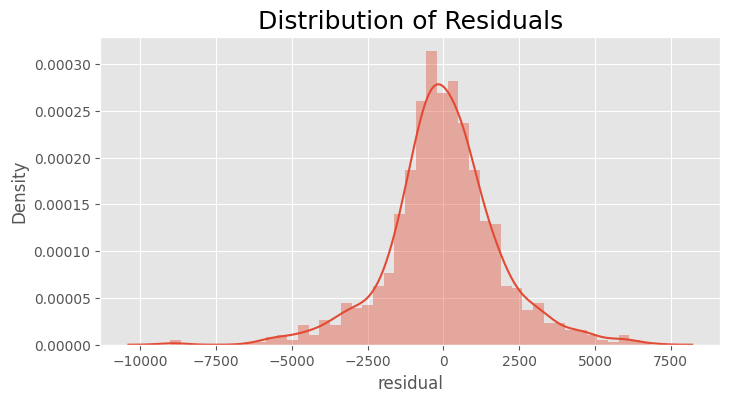

Residuals are not normally distributed


In [35]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

From the code above we got our p-value of 0.6644 which can be considered normal because it’s above the 0.05 threshold. The histogram plot also show a normal distribution (despite it might be looking a little skewed because we only have 15 observation in our dataset). From both of those result we can assume that our residual are normally distributed.

Multicollinearity
This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data using the corr() function from Pandas dataframe. Then we can display it as a heatmap using heatmap() function from Seaborn.

In [42]:
# creating the correlation matrix
corr = df[['int_rate', 'installment', 'annual_inc', 'revol_bal', 'revol_util', 'total_acc', 'acc_open_past_24mths', 'home_ownership_MORTGAGE',
           'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified', 'loss']].corr()

display(corr);

,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loss
int_rate,1.000000,0.029957,-0.230279,-0.064346,0.139886,-0.162940,0.206892,-0.078447,0.045165,0.044024,-0.166099,-0.011332,0.171322,-0.053396
installment,0.029957,1.000000,0.549896,0.358988,0.160796,0.215871,-0.002201,0.180741,0.008187,-0.174726,-0.169844,0.057914,0.102152,0.934911
annual_inc,-0.230279,0.549896,1.000000,0.361672,0.199729,0.326445,0.139248,0.281255,-0.094227,-0.202045,-0.052270,0.088158,-0.042470,0.542838
revol_bal,-0.064346,0.358988,0.361672,1.000000,0.227484,0.233177,-0.052019,0.200520,-0.009714,-0.181572,-0.024965,-0.016391,0.041184,0.345989
revol_util,0.139886,0.160796,0.199729,0.227484,1.000000,-0.065012,-0.227013,0.071799,-0.072731,-0.019793,-0.109959,0.048576,0.054490,0.141606
total_acc,-0.162940,0.215871,0.326445,0.233177,-0.065012,1.000000,0.395549,0.256350,-0.020952,-0.226554,-0.002472,-0.058370,0.063708,0.209460
acc_open_past_24mths,0.206892,-0.002201,0.139248,-0.052019,-0.227013,0.395549,1.000000,0.114399,-0.017726,-0.095633,-0.078580,-0.019368,0.095770,-0.020232
home_ownership_MORTGAGE,-0.078447,0.180741,0.281255,0.200520,0.071799,0.256350,0.114399,1.000000,-0.248911,-0.774601,0.008419,-0.001193,-0.006827,0.153038
home_ownership_OWN,0.045165,0.008187,-0.094227,-0.009714,-0.072731,-0.020952,-0.017726,-0.248911,1.000000,-0.419738,-0.035467,-0.043663,0.079921,0.013617
home_ownership_RENT,0.044024,-0.174726,-0.202045,-0.181572,-0.019793,-0.226554,-0.095633,-0.774601,-0.419738,1.000000,0.015271,0.029630,-0.045791,-0.152310


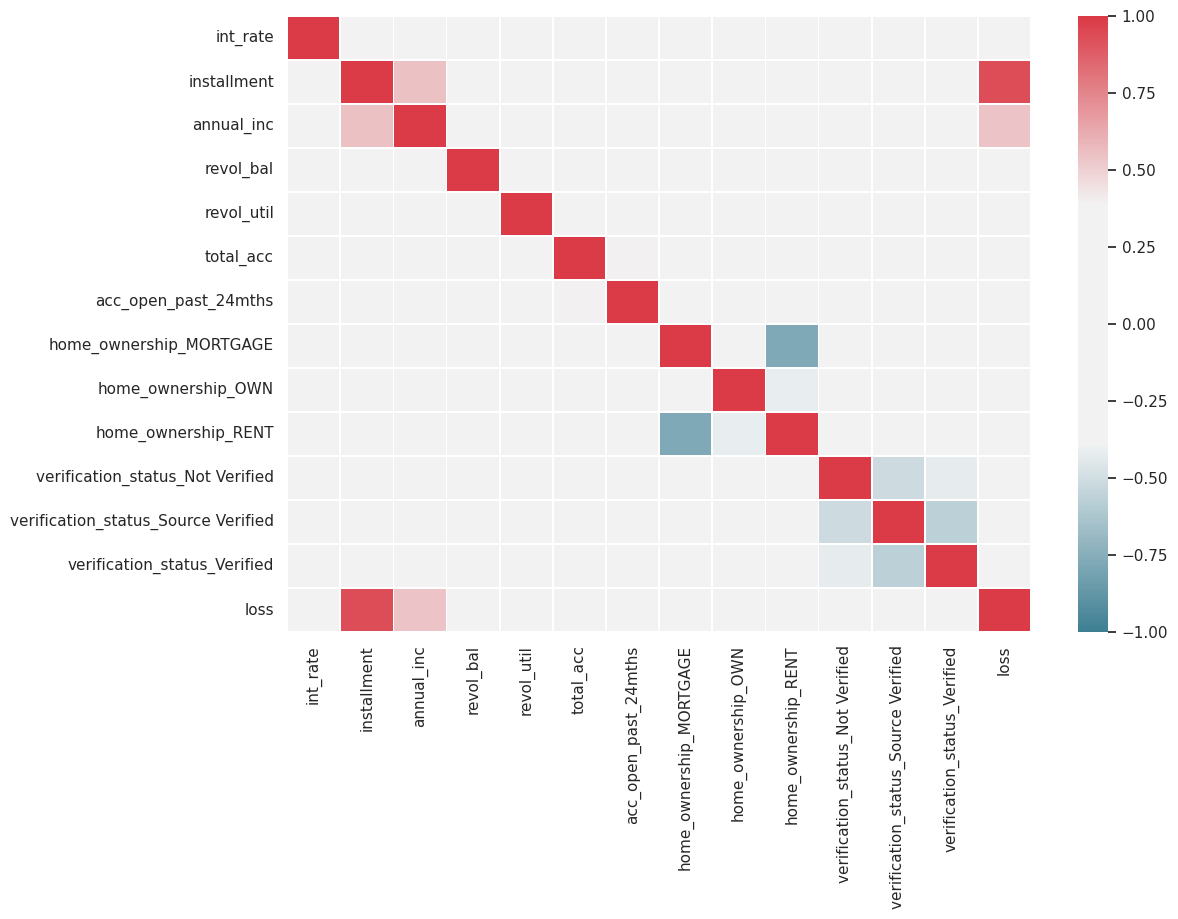

In [45]:
# creating the heatmap for the correlation matrix
sns.set(rc = {'figure.figsize':(12,8)})
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)

The image shows that there are some positive relationship between advertising and pie_sales and a negative relationship between price and pie_sales. Both of this result support our resulting model from before. Most importanly, notice how the price and advertising have almost 0 correlation coefficient. This means both of our independent variable are not affecting each other and that there is no multicollinearity in our data.

Autocorrelation
Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing Durbin-Watson test to determine if either positive or negative correlation is present. In this step we will use the durbin_watson () function from statsmodel to calculate our Durbin-Watson score and then assess the value with the following condition:

If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied
If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied
If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [46]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9837375176078338
Little to no autocorrelation 

Assumption satisfied


Our model got a Durbin-Watson score of about 1.6831 which is between 1.5 and 2.5, so we can assume that there is no autocorrelation in our residual.

Homoscedasticity
This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms. To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.

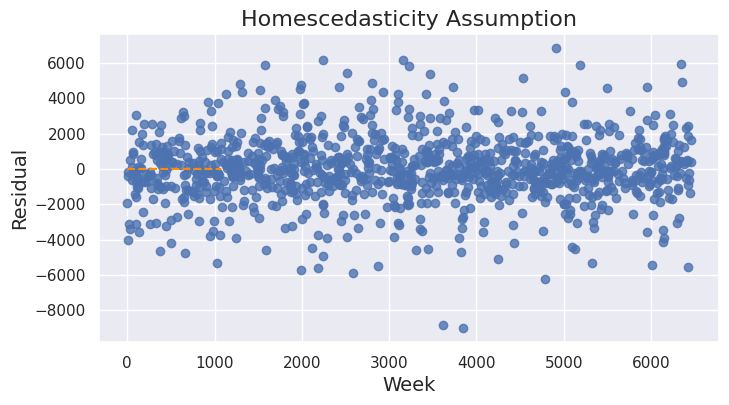

In [47]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df.index, y=df.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show() 

Conclusion
Our models succesfuly passed all the tests in the model validation steps, so we can conclude that our model can perform well to predict future pie sales by using the two independent variables, price and advertising. But still, our model only has R² score of 52.14%, which means that there is still about 48% unknown factors that are affecting our pie sales.

In [13]:
#creating the training and validation set using 60:40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [15]:
print("df:\t\t",df.shape)

print("X:\t\t",X.shape)

print("y:\t\t", y.shape)

df:		 (1077, 14)
X:		 (1077, 13)
y:		 (1077, 1)


Com o modelo treinado, ele já está pronto para fazer previsões em cima de dados novos. Como separamos lá em cima dos dados de teste na variável `y_test`, vamos fazer as previsões usando o método `predict()` e armazenar na variável `y_pred`.

In [23]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Se estamos falando de Regressão Linear, estamos falando de construir reta. Essa reta possui coeficientes associados com os ângulos de inclinação e intercepto. Neste caso específico da Regressão Linear Simples, temos apenas um coeficiente de regressão.

Para obtermos os **coeficiente de regressão** e **intercepto**, basta acessar os atributos do modelo diretamente da variável `ml_model`.

In [24]:
# printing the coeficients
print("Coef:\t", model.coef_)
print("Intercept:\t", model.intercept_)

Coef:	 [[-1.04034265e+02  1.92597772e+01  6.61757659e-03  1.25526612e-03
   9.85176524e-01 -1.02907944e+01 -2.07546059e+01 -7.10192054e+01
   5.94095598e+01  1.16096456e+01  4.84515615e+01 -7.99135906e+01
   3.14620291e+01]]
Intercept:	 [1573.35179987]


Um modelo de *Machine Learning* deve ser quantificável, seja em termos de desempenho ou precisão. No caso de modelos de Regressão, 
Vamos testar o desempenho do modelo em cima do nosso conjunto de testes usando as métricas abaixo:

* ***R-Squared -*** métrica popularmente usada para calcular a acurácia do seu modelo. Basicamente, calcula como o seu modelo se encaixa aos seus dados, quantificando a qualidade entre 0 e 1. No caso, a melhor pontuação que seu modelo pode atingir é 1.

* ***Mean Absolut Error (MAE) -*** é a média absoluta do erro, representada pela média das somas dos erros individuais (distâncias entre pontos e retas).

* ***Mean Squared Error (MSE) -*** é a média dos quadrados dos error e provavelmente a métrica mais conhecida. Tende a penalizar exponencialmente os erros, tratando diferentemente erros pequenos e grandes.

In [18]:
#evaluating the model
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.8750001902975137
MAE:		 1362.6767956229985
MSE:		 3620560.528699045
